# Part 3.5: Unsupervised Learning - Principal Component Analysis (PCA)

**Dimensionality Reduction** is the process of reducing the number of features in a dataset. This is useful for:
- **Visualization**: We can't visualize data with more than 3 features.
- **Efficiency**: Fewer features can mean faster model training.
- **Noise Reduction**: Removing less important features can sometimes improve model performance.

**PCA** is the most popular linear dimensionality reduction technique. It works by identifying the directions of maximum variance in the data, called **principal components**, and projecting the data onto a new, lower-dimensional subspace.

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset (64 features - 8x8 images)
digits = load_digits()
X = digits.data
y = digits.target

# PCA is affected by scale, so we need to scale the data first
X_scaled = StandardScaler().fit_transform(X)

### Applying PCA
Let's reduce the 64-dimensional digit data to 2 dimensions for visualization.

In [2]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape: {X_pca.shape}")

Original shape: (1797, 64)
Reduced shape: (1797, 2)


### Visualizing the Reduced Data

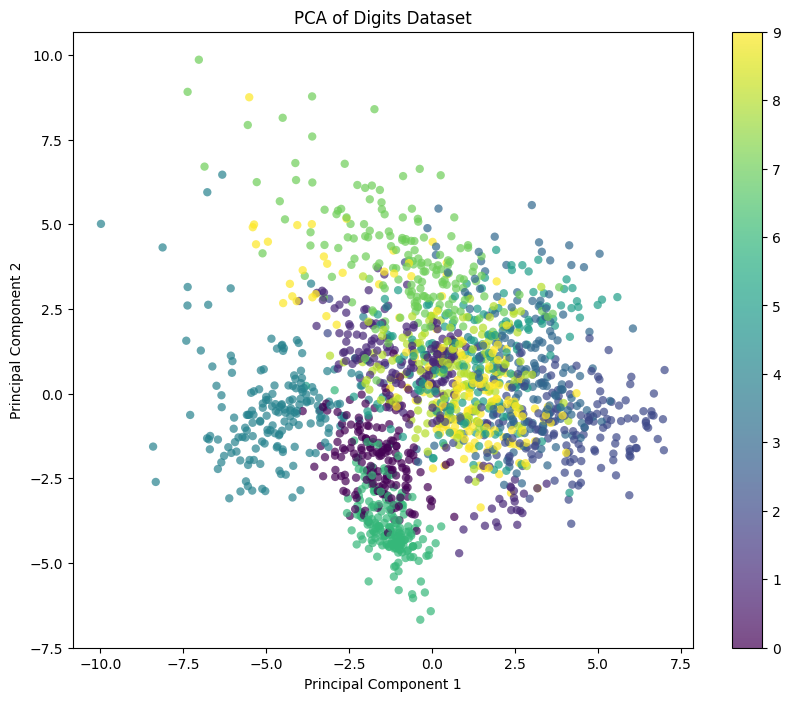

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='none', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Digits Dataset')
plt.colorbar()
plt.show()

### Explained Variance
An important attribute of a fitted PCA object is the `explained_variance_ratio_`. It tells you how much of the original data's variance is captured by each principal component. This helps in choosing the number of components.

In [5]:
import numpy as np

Explained variance by component 1: 0.1203
Explained variance by component 2: 0.0956
Total explained variance for 2 components: 0.2159


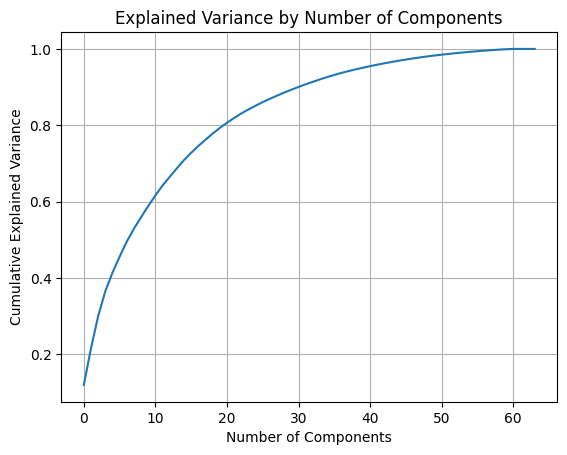

We can see that with about 10 components, we can capture ~70% of the variance.


In [6]:
print(f"Explained variance by component 1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Explained variance by component 2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total explained variance for 2 components: {np.sum(pca.explained_variance_ratio_):.4f}")

# Let's see the cumulative variance explained
pca_full = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()
print("We can see that with about 10 components, we can capture ~70% of the variance.")